# Due July/23/2018 11:59:59 PM, PST.

### Kullback-Leibler (KL) divergence (15%)

The Kullback-Leibler (KL) divergence between two discrete-valued distributions $P(X)$, $Q(X)$ is defined as follows:

$$
KL(P||Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}
$$

Here, we assume all $P(X)$ and $Q(x)$ are greater than zero. We wish to prove following facts.

(a) For all $P, Q$, we have $KL(P || Q) \geq 0$, the equality will hold if and only if $P = Q$. So this measure is non-negative.

(b) If we define following KL divergence for conditional distribution:

$$KL(P(X|Y)||Q(X/Y)) = \sum_{y}P(y) (\sum_{x}\log P(x|y)\log \frac{P(x|y)}{Q(x|y)})$$

Show that 

$$KL(P(X,Y)||Q(X,Y)) = KL(P(X)||Q(X)) + KL(P(Y|X)||Q(Y|X))$$.

(c) Let the empirical distribution be $\hat{P}(x) = \frac{1}{m}\sum_{i=1}^{m}1\{x^{(i)} = x\}$, i.e., just the same as picking a random example from the training set. Suppose we have some family of distributions $P_{\theta}$ parameterized by $\theta$. Prove that 


$$\arg \min_{\theta} KL (\hat{P} || P_{\theta})＝\arg \max_{\theta}\sum_{i=1}^{m}\log P_{\theta}(x^{(i)})$$

This indicates that finding the maximum likelihood estimate for the parameter $\theta$ is equivalent to finding $P_{\theta}$ with minimal KL divergence from $\hat{P}$.




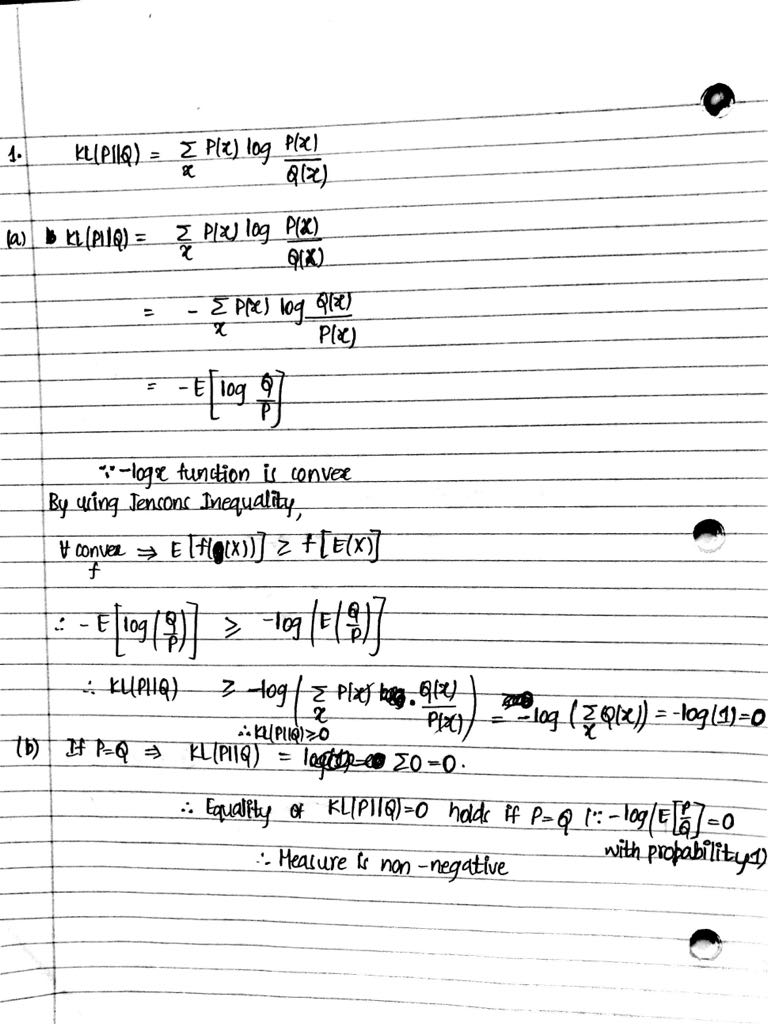

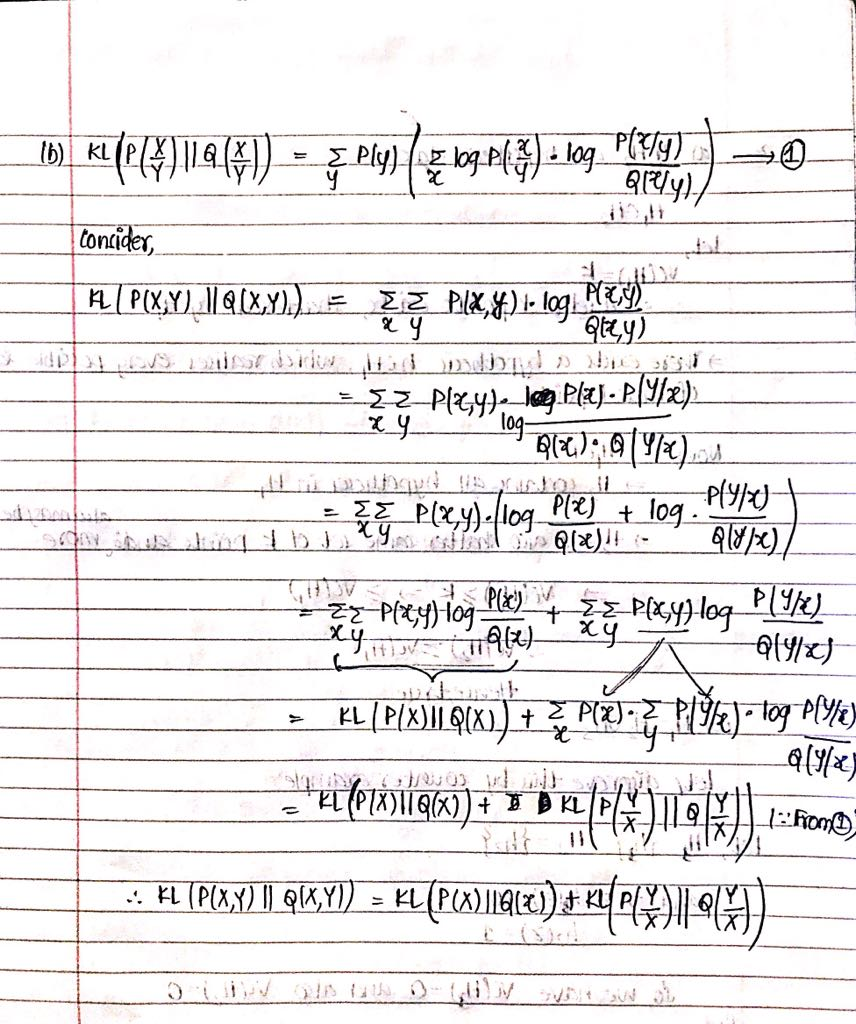

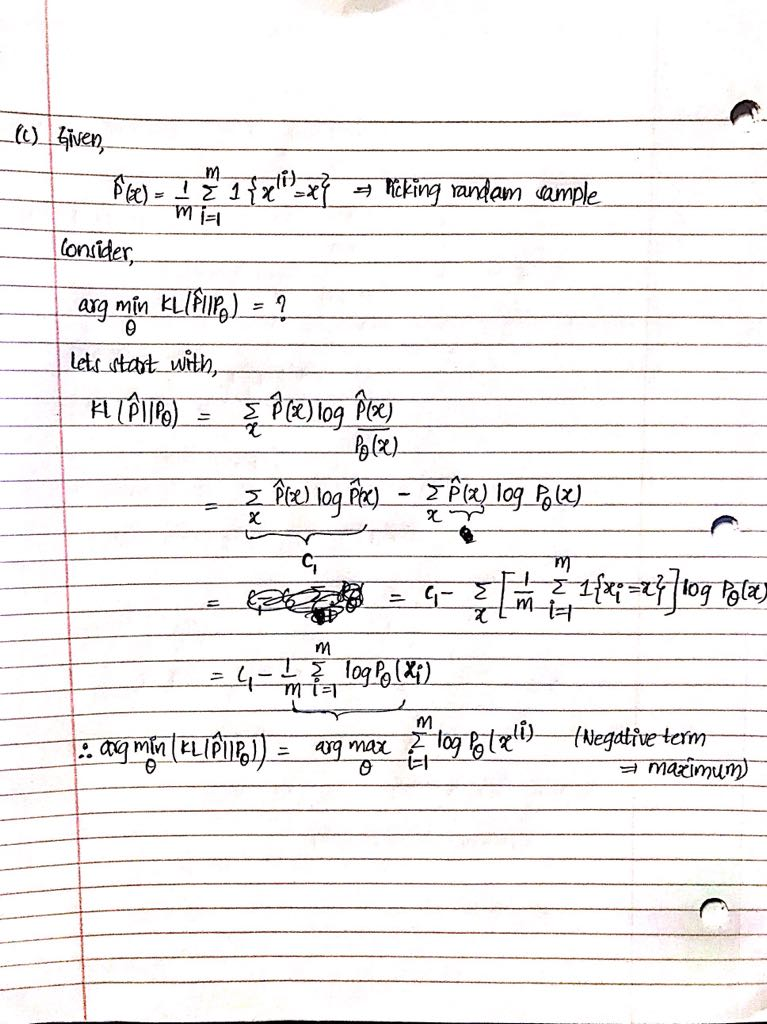

In [1]:
from IPython.display import Image,display
list_of_images = ['data/1(a).JPEG', 'data/1(b).JPEG', 'data/1(c).JPEG']
for img in list_of_images:
    display(Image(filename=img))

### EM for MAP estimation (15%)

The EM algorithm that we talked about in class was for solving a maximum likelihood estimation problem. Now, we wish to generalize EM to solve a maximum a posteriori probability (MAP) estimation problme as 

$$\arg \max_{\theta} (\prod_{i=1}^{m}\sum_{z^{(i)}} p (x^{(i)}, z^{(i)}|\theta)) p(\theta)$$

where $p(\theta)$ is prior on the paramters, $x^{(i)}$ are our samples and $z^{(i)}$ are latent variables contributed to sample $x^{(i)}$.

Could you derive E-step and M-step for EM algorithm to MAP estimation?
 


Solution:

EM Algorithm : Applying log,
$$\begin{align*}
l(\theta) 
&= \sum_{i=1}^m \log p(x^{(i)}|\theta) + \log p(\theta) \\
&= \sum_{i=1}^m \log \sum_{z^{(i)}} p(x^{(i)}, z^{(i)}|\theta) + \log p(\theta) \\
&= \sum_{i=1}^m \log \sum_{z^{(i)}} Q_i(z^{(i)}) \frac{p(x^{(i)}, z^{(i)}|\theta)}{Q_i(z^{(i)})} + \log p(\theta) \\
&>= \sum_{i=1}^m \sum_{z^{(i)}} Q_i(z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)}|\theta)}{Q_i(z^{(i)})} + \log p(\theta) 
\end{align*}$$

The above equality holds when $\frac{p(x^{(i)}, z^{(i)}|\theta)}{Q_i(z^{(i)})} = c$ and since $\sum_zQ_i(z^{(i)}) = 1$, the following holds:
$$\begin{align*}
Q_i(z^{(i)})
&= \frac{p(x^{(i)}, z^{(i)}| \theta)}{p(x^{(i)}| \theta)} \\
&= p(z^{(i)} | x^{(i)}, \theta)
\end{align*}$$

EM for MAP is the following:  
Repeat until convergence  
{  
(E-step) For each i, set  
    $$ Q_t(z^{(i)}) = p(z^{(i)} | x^{(i)}, \theta) $$
    
(M-step) set  
    $$ θ = arg\ max_{\theta} \sum_{i=1}^m \sum_{z^{(i)}} Q_i(z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)}|\theta)}{Q_i(z^{(i)})} +\log p(\theta) $$  
}

Convergence:

$ l(\theta) = \sum_{i=1}^m \log p(x^{(i)}|\theta) + \log p(\theta)  $ monotonically increases with each iteration.
Showing that $ l(\theta^{(t)}) <= l(\theta^{(t+1)}) $

Firstly, given $ Q_i(z^{(i)}) := p(z^{(i)} | x^{(i)}, \theta) $ the following equality holds:
$$ l(\theta^{t)}) = \sum_{i=1}^m \sum_{z^{(i)}} Q_i(z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)}|\theta^{(t)})}{Q_i(z^{(i)})} + \log p(\theta^{(t)}) = L(\theta^{t})$$

W.R.T the lower bound 
$$ L(\theta) = \sum_{i=1}^m \sum_{z^{(i)}} Q_i(z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)}|\theta)}{Q_i(z^{(i)})} + \log p(\theta) $$ 
the next iteration is done by explicitly choosing a $\theta^{(t+1)}$ w.r.t the posertiori of $ Q_i^{(t)}$ to maximize $L(\theta)$, which means $$L(\theta^{t}) <= L(\theta^{(t+1)})$$

W.R.T the loss, the equality 
$$\begin{align*}
l(\theta^{(t+1)}) 
&= L(\theta^{(t+1)}) \\
&= \sum_{i=1}^m \log p(x^{(i)}|\theta^{(t+1)}) + \log p(\theta^{(t+1)})
\end{align*}$$

holds only for 
$$Q_{(t+1)}(z^{(i)}) = p(z^{(i)} | x^{(i)}, \theta^{(t+1)})$$

which means 
$$ l(\theta^{(t+1)}) = L(\theta^{(t+1)}) >= L(\theta^{t}) = l(\theta^{t})$$


### Poisonous mushrooms (70%)

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, We tried to binarized the feature space. Look at the feature_names below to see all 126 binary names. mushroom.map and mushroom.data will be provided.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import warnings
    
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

warnings.filterwarnings('ignore')

feature_names = []
with open('data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names: %d' %len(feature_names))



Loaded feature names: 126


In [3]:
X, Y = [], []

with open('data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for $k$ in $[1, 50]$.


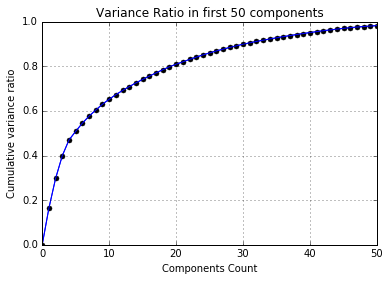

In [4]:
def pca():
    
    # PCA containing 50-components
    comp_count = 50
    pca = PCA(n_components = comp_count)
    pca.fit(train_data)

    # cummulative ratio of explained variance
    varRatio = pca.explained_variance_ratio_
    cum_var_ratio = np.cumsum(np.concatenate(([0], varRatio)))

    
    # plotting data into a graph
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cum_var_ratio, color = 'blue', marker = 'o', ms = 5, mfc = 'black')
    
    plt.plot(range(comp_count+1), cum_var_ratio)
    plt.xlabel('Components Count')
    plt.ylabel('Cumulative variance ratio')
    plt.ylim([0,1])
    plt.grid(True)
    plt.title("Variance Ratio in first 50 components")
    plt.show()

pca()

Almost total variance(100%) is explained in the first 50 PCA components. If we consider only first 2 components, they together capture almost 30% of the variance.

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

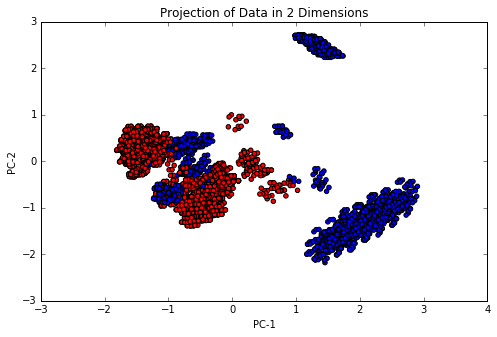

In [5]:
def pca_project():

    # project data to two dimensions
    comp_count = 2
    pca = PCA(n_components = comp_count)
    pca_data = pca.fit_transform(train_data)

    # Visualizing data with color classification
    plt.figure(figsize=(8,5))
    cmap = {0: 'red', 1: 'blue'}
    clrs = [cmap[x] for x in train_labels]
    plt.scatter(pca_data[:,0], pca_data[:,1], color=clrs, edgecolors="black", marker='o')
    plt.title("Projection of Data in 2 Dimensions")
    plt.xlabel('PC-1')
    plt.ylabel('PC-2')
    plt.show()

pca_project()

(3) Run KMeans with $[1,16]$ clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

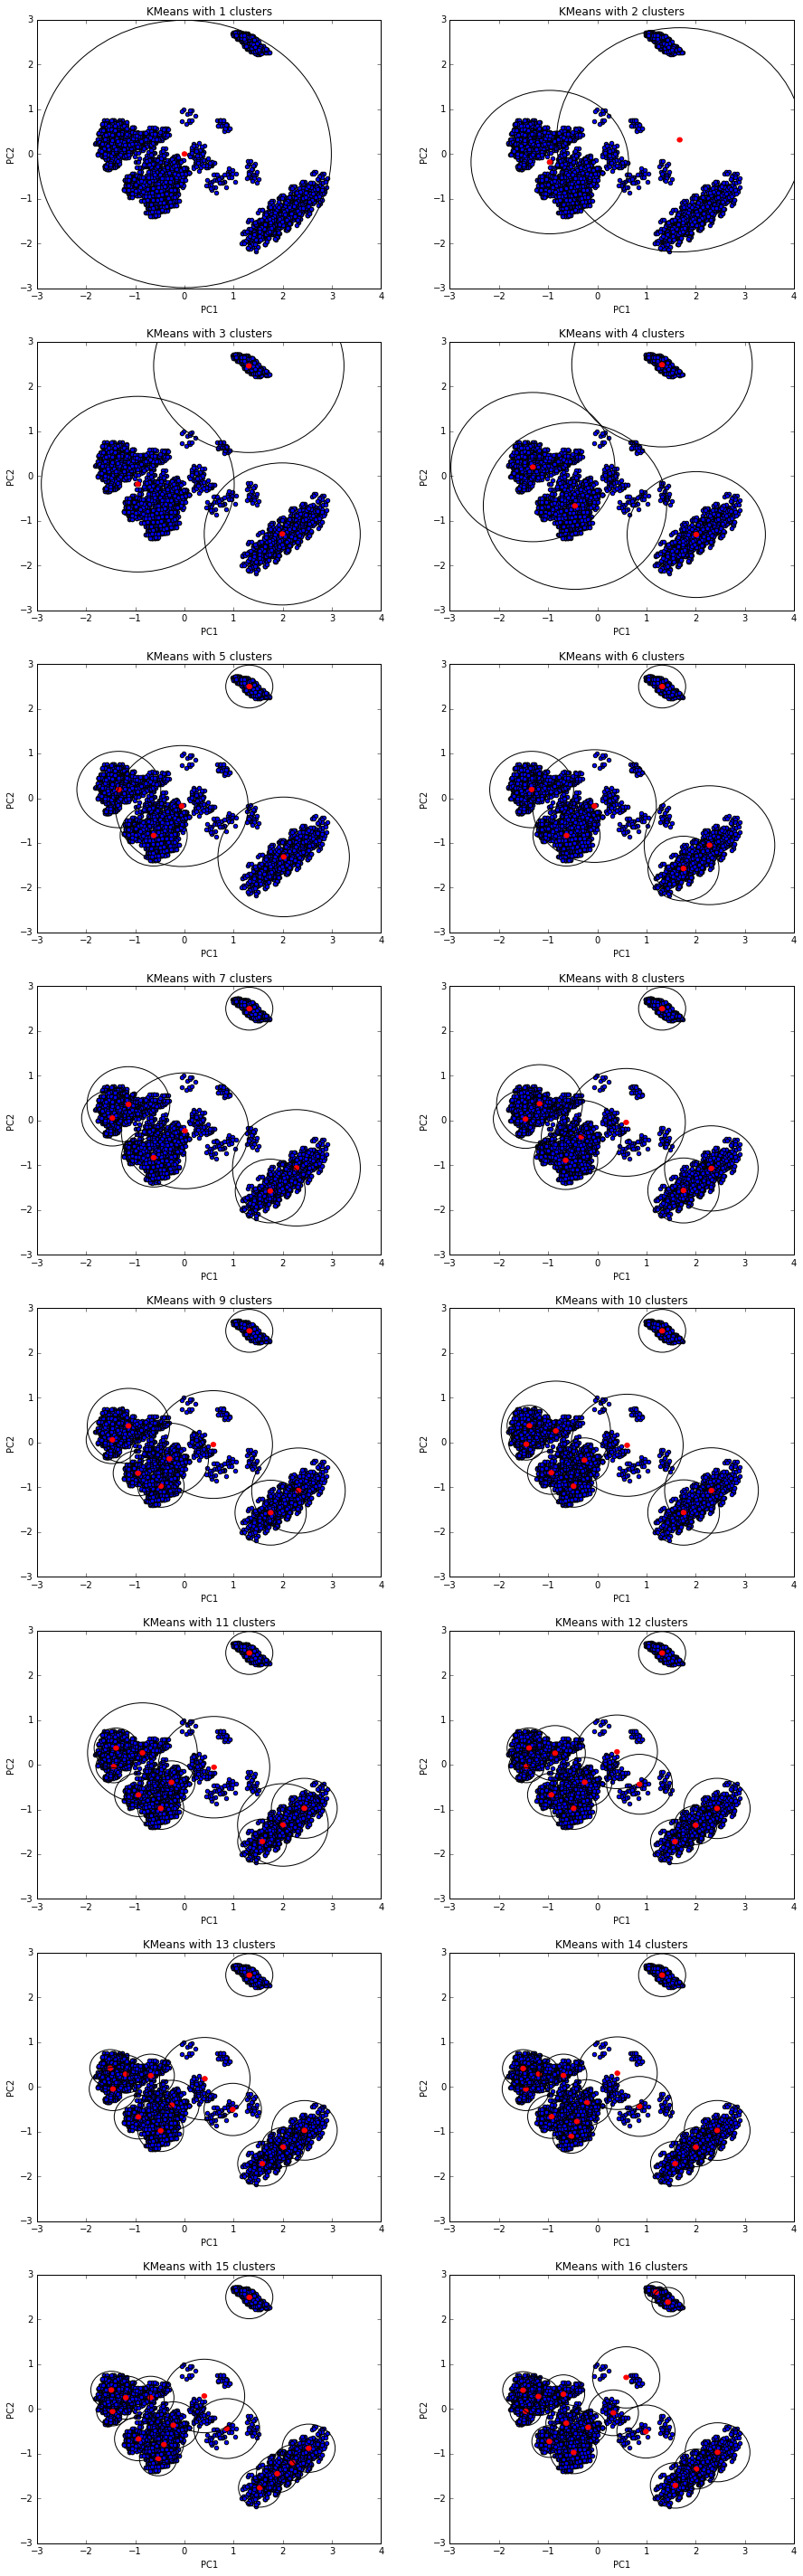

In [6]:
def run_kmeans():

    plt.figure(figsize=(15, 50))

    # Project the training data to 2 dimensions
    comp_count = 2
    pca = PCA(n_components = comp_count)
    pca_data_tx = pca.fit_transform(train_data)

    for i in range(16):
        
        ax = plt.subplot(8, 2, i+1)
        
        #setup KMeans model and generate clusters from training data
        kmeans = KMeans(n_clusters=i+1, init='k-means++')
        clusters = kmeans.fit(pca_data_tx)

        # Find center of cluster
        centers = [(clusters.cluster_centers_[j,0],clusters.cluster_centers_[j,1]) for j in range(i+1)]
        #Find distances from center to each point
        distances = kmeans.transform(pca_data_tx)

        # Plot the clusters on graph
        ax.scatter(pca_data_tx[:, 0], pca_data_tx[:, 1], edgecolors='black',color='blue',marker='o')
        plt.title('KMeans with %i clusters' %(i+1)) 
        plt.xlabel("PC1")
        plt.ylabel("PC2")
    
        # Mark cluster center and a  enclosing circle on all points of cluster
        for j in range(i+1):
            circle = plt.Circle(centers[j], np.max(distances[clusters.labels_ == j,j]),edgecolor='black',fill=False)
            my_center = plt.Circle(centers[j], 0.05, color='red')
            ax.add_artist(circle)
            ax.add_artist(my_center)

run_kmeans()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').


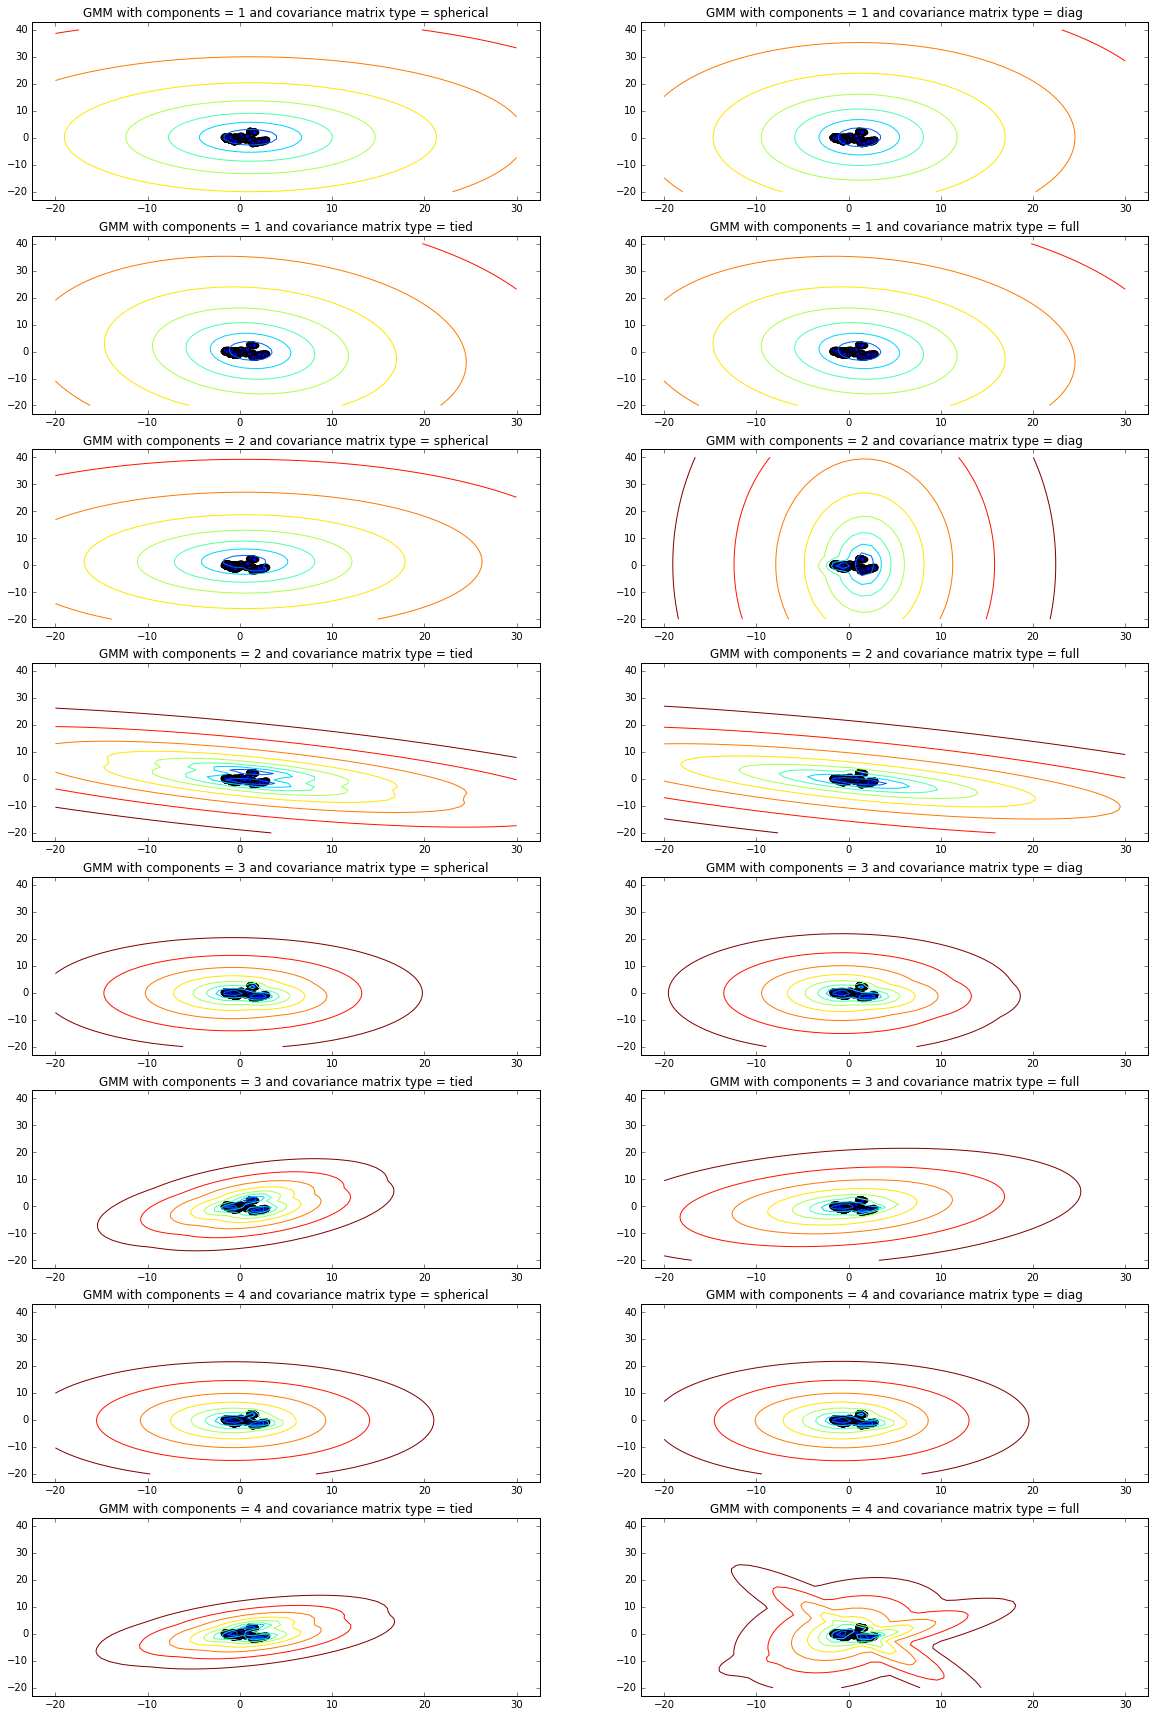

In [7]:
def run_gmm():
    
    fig = plt.figure(figsize=(20, 30))
    count=1

    # get positive examples in 2D-data
    pos_labels = np.where(train_labels == 1)
    comp_count = 2
    pca = PCA(n_components = comp_count)
    pca_data = pca.fit_transform(train_data)
    pos_pca = pca_data[pos_labels]

    # varying gmm components from 1-4 and covarinace types in ('spherical', 'diag', 'tied', 'full')
    for gmm_comp in range(4):
        for covar in ["spherical","diag","tied","full"]:

            #gmm model with varying components
            gmm = GaussianMixture(n_components=gmm_comp+1, covariance_type=covar)
            gmm.fit(pos_pca)
            x = np.linspace(-20., 30.)
            y = np.linspace(-20., 40.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = gmm.score_samples(XX)
            Z = Z.reshape(X.shape)
            Z = -(Z)

            #plotting the contour map
            plots = fig.add_subplot(8,2,count)
            CS = plots.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
            plots.scatter(pca_data[:, 0], pca_data[:, 1])
            plots.axis('tight')
            title = "GMM with components = " + str(gmm_comp+1) + " and covariance matrix type = " + covar
            plt.title(title)
            count+=1
    plt.show()

run_gmm()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [21]:
def pos_neg_gmm(n_comp, n_components, covariance_type ):
    
    #2-D training data
    #n_comp = 2
    pca = PCA(n_components = n_comp)
    pca_data = pca.fit_transform(train_data)
    
    # GMM with 4 components on positive data
    positive_pca = pca_data[train_labels == 1, :]
    pos_gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    pos_gmm.fit(positive_pca)

    # GMM with 4 components on negative data
    negative_pca = pca_data[train_labels == 0, :]
    neg_gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    neg_gmm.fit(negative_pca)

    # 2-D test data
    pca_test_data = pca.transform(test_data)

    # Test positive and negative GMM's
    positive_score = pos_gmm.score_samples(pca_test_data)
    negative_score = neg_gmm.score_samples(pca_test_data)

    # Predict positive by if logprob under positive is greater
    test_preds = np.zeros(1124)
    for i in range(1124):
        if positive_score[i] > negative_score[i]:
            test_preds[i] = 1

    # Report the accuracy
    correct, total = 0,0
    for pred, label in zip(test_preds, test_labels):
        if pred == label: correct += 1
        total += 1
    score = 100.0*correct/total
    print('total: %3d  correct: %3d  accuracy percentage: %3.2f' %(total, correct, score))
    return score
   
score = pos_neg_gmm(2, 4, "full")

total: 1124  correct: 1068  accuracy percentage: 95.02


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.


In [22]:
def best_model():
    scoredetails=[]
    scores =[]
    for i in range(6):
        for j in range(6):
            for covar in ["spherical","diag","tied","full"]:
                if(2*(i+1)*(j+1)*2<50):
                        scores.append(pos_neg_gmm(i+1,j+1,covar))
                        scoredetails.append([i+1, j+1, covar])

    print("Maximum accuracy is", max(scores), "% with",scoredetails[scores.index(max(scores))][0], 
          "pca components", scoredetails[scores.index(max(scores))][1], "gmm components", 
          scoredetails[scores.index(max(scores))][2], "covariance matrix type")
    
best_model()

total: 1124  correct: 949  accuracy percentage: 84.43
total: 1124  correct: 949  accuracy percentage: 84.43
total: 1124  correct: 949  accuracy percentage: 84.43
total: 1124  correct: 949  accuracy percentage: 84.43
total: 1124  correct: 1010  accuracy percentage: 89.86
total: 1124  correct: 1010  accuracy percentage: 89.86
total: 1124  correct: 993  accuracy percentage: 88.35
total: 1124  correct: 1010  accuracy percentage: 89.86
total: 1124  correct: 1019  accuracy percentage: 90.66
total: 1124  correct: 1021  accuracy percentage: 90.84
total: 1124  correct: 1029  accuracy percentage: 91.55
total: 1124  correct: 1019  accuracy percentage: 90.66
total: 1124  correct: 1027  accuracy percentage: 91.37
total: 1124  correct: 1028  accuracy percentage: 91.46
total: 1124  correct: 1030  accuracy percentage: 91.64
total: 1124  correct: 1030  accuracy percentage: 91.64
total: 1124  correct: 1027  accuracy percentage: 91.37
total: 1124  correct: 1027  accuracy percentage: 91.37
total: 1124  co